<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/Introduction_to_Computer_Vision_WIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-06-21 05:09:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   103MB/s    in 1.0s    

2021-06-21 05:09:30 (103 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
zip_file = zipfile.ZipFile("pizza_steak.zip", "r")
zip_file.extractall()
zip_file.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# set seed
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(  rescale=1./255)
valid_datagen = ImageDataGenerator(  rescale=1./255)

In [ ]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              class_mode="binary",
                                              target_size=(224,224),
                                              seed=42
                                              )


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                       kernel_size=3,
                       activation="relu",
                       input_shape=(224,224,3)
                       ),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"
                            ),
  tf.keras.layers.Conv2D(10,3, activation="relu"),
  tf.keras.layers.Conv2D(10,3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])



In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"]
                )

In [ ]:
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data)

                       )

Epoch 1/5
47/47 [==============================] - 74s 2s/step - loss: 0.5751 - accuracy: 0.6820 - val_loss: 0.3950 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 72s 2s/step - loss: 0.4186 - accuracy: 0.8067 - val_loss: 0.3528 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 72s 2s/step - loss: 0.3765 - accuracy: 0.8380 - val_loss: 0.3427 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 72s 2s/step - loss: 0.3609 - accuracy: 0.8447 - val_loss: 0.3161 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 72s 2s/step - loss: 0.3003 - accuracy: 0.8747 - val_loss: 0.2895 - val_accuracy: 0.8840


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# Trying NON CNN model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Define Mode
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")                          
])

# Compile Model
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit Model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 1.5834 - accuracy: 0.5133 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#n Improving Model 2

In [ ]:
tf.random.set_seed(42)

# Model same as above pus extra
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
 tf.keras.layers.Dense(100,activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(1, activation="sigmoid")
])


model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 173ms/step - loss: 3.2376 - accuracy: 0.6100 - val_loss: 2.7119 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 1.0221 - accuracy: 0.7060 - val_loss: 0.4893 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6314 - accuracy: 0.7380 - val_loss: 0.4696 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6414 - accuracy: 0.7180 - val_loss: 0.6499 - val_accuracy: 0.7360
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.4576 - accuracy: 0.7993 - val_loss: 0.7814 - val_accuracy: 0.6540


In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_29 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_30 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Binary Classification - Lets break Data down

## Visualize Images

## Preprocess Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
# loading & training data in batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches
len(train_data), 1500/32

(47, 46.875)

In [ ]:
### Create a baseline and CNN model
##### baseline is simple/existing model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create Base Line Model
model_4 = Sequential([
Conv2D(filters=10,
                              kernel_size=3,
                              strides=1,
                              padding="valid",
                              activation="relu",
                              input_shape=(224,224,3)),
Conv2D(10, 3,activation="relu"),
Conv2D(10, 3, activation="relu"),
Flatten(),
Dense(1, activation="sigmoid")
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy","Precision"]
                )
model_4.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_19 (Flatten)         (None, 475240)            0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit Model
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.1621 - accuracy: 0.9520 - precision: 0.9544 - val_loss: 0.4574 - val_accuracy: 0.8180 - val_precision: 0.8354
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0273 - accuracy: 0.9967 - precision: 0.9960 - val_loss: 0.5533 - val_accuracy: 0.8240 - val_precision: 0.8403
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.0127 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.6319 - val_accuracy: 0.7940 - val_precision: 0.8326
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0055 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.6783 - val_accuracy: 0.7920 - val_precision: 0.8288
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0033 - accuracy: 1.0000 - precision: 1.0000 - val_loss: 0.7639 - val_accuracy: 0.8040 - val_precision: 0.8248


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 133ms/step - loss: 0.7639 - accuracy: 0.8040 - precision: 0.8248


[0.76392662525177, 0.8040000200271606, 0.8247863054275513]

In [ ]:
# Evaluate Model
import pandas as pd

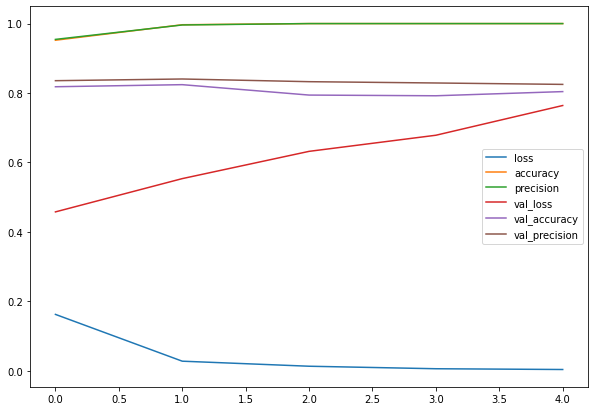

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# Plot validation & traning curves separatley

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_curve(history):
  """
  Return seperate loss curve for validation & Train
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  # precision = history.history["precision"]
  # val_precision = history.history["val_precision"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss curves")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()

  # plot loss
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend();

  # # plot loss
  # plt.figure()
  # plt.plot(epochs, precision, label="training_precision")
  # plt.plot(epochs, val_precision, label="val_precision")
  # plt.title("Precision curves")
  # plt.xlabel("epochs")
  # plt.ylabel("precision")
  # plt.legend();
  
  



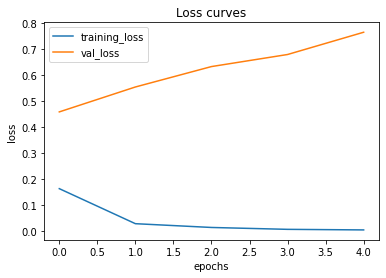

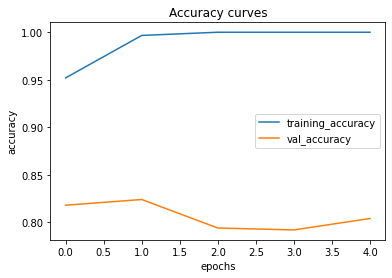

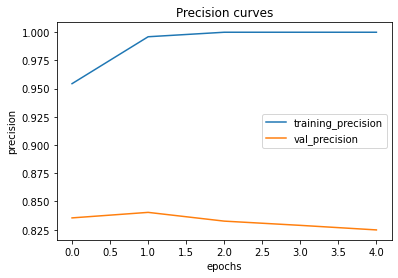

In [ ]:
plot_loss_curve(history_4)



```
# This is formatted as code
```

# Reduce Overfitting

> MaxPool2D


In [ ]:
model_5 = Sequential([
   Conv2D(filters=10, kernel_size=3, activation="relu", input_shape =(224,224,3) ),
   MaxPool2D(),
   Conv2D(filters = 10,kernel_size = 3, activation="relu"),
   MaxPool2D(),
   Conv2D(filters=10,kernel_size = 3,activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1,activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch= len(train_data),  validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6309 - accuracy: 0.6273 - val_loss: 0.4961 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4647 - accuracy: 0.7867 - val_loss: 0.3876 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4590 - accuracy: 0.8047 - val_loss: 0.4150 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4188 - accuracy: 0.8173 - val_loss: 0.3841 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3847 - accuracy: 0.8347 - val_loss: 0.3599 - val_accuracy: 0.8200


In [ ]:
model_5.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 6760)            

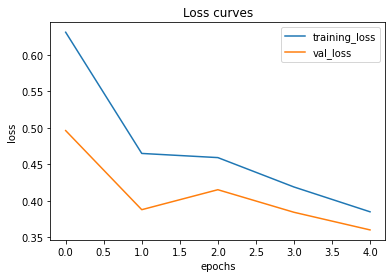

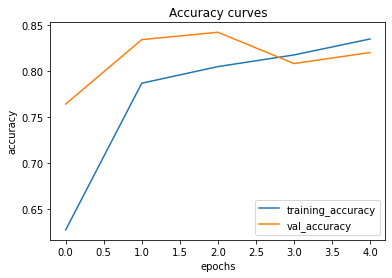

In [ ]:
plot_loss_curve(history_5)

In [ ]:
# Reduce Overfitting by using Augmentation

In [ ]:
train_datagen_augmentation = ImageDataGenerator(rescale=1.0/255,
                                                rotation_range=0.2,
                                                shear_range=0.2,
                                                zoom_range=0.2,
                                                width_shift_range=0.2,
                                                height_shift_range=0.3,
                                                horizontal_flip=True)

# Create ImageDataGenerator without rescale
train_datagen= ImageDataGenerator(rescale=1.0/255)

# Create DATA gen for Test
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
# Visualikse Data Augmentation

In [ ]:
# Import Sata & Augment it from training Data

In [ ]:
print("Augmented train data")
train_data_augmented = train_datagen_augmentation.flow_from_directory(train_dir, 
                                                                      target_size=(224,224), 
                                                                      batch_size=32,
                                                                      class_mode="binary", 
                                                                      shuffle=False) # For demo only

print("Non Augmnetated train Data")
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle =False)                                                                      

print("Non Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), class_mode="binary", batch_size=32)

Augmented train data
Found 1500 images belonging to 2 classes.
Non Augmnetated train Data
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
 images, labels = train_data.next()
 augmented_images,  augmnented_labels = train_data_augmented.next()

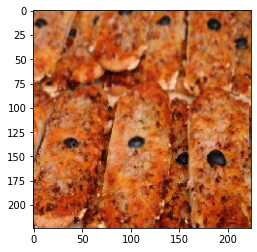

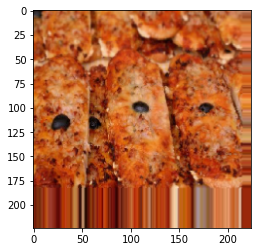

In [ ]:
import random
image_number = random.randint(0,32)
plt.imshow(images[image_number])
plt.figure()
plt.imshow(augmented_images[image_number])

In [ ]:
# Model with Augmnetated Data

In [ ]:
# Create a model
tf.random.set_seed(42)

# Define Model
model_6 = Sequential([
   Conv2D(filters=10, kernel_size=3, activation="relu", input_shape =(224,224,3)),
   MaxPool2D(pool_size= 2),
   Conv2D(filters=10, kernel_size=3, activation="relu"),
   MaxPool2D(),
   Conv2D(filters=10, kernel_size=3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")                      
])

# Compile Model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit Model
history_6 = model_6.fit(train_data_augmented, 
                        epochs=5, 
                        steps_per_epoch=len(train_data_augmented), 
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f59b02815f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 1/5
47/47 [==============================] - 21s 433ms/step - loss: 0.7055 - accuracy: 0.5667 - val_loss: 0.6835 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6887 - accuracy: 0.5313 - val_loss: 0.6574 - val_accuracy: 0.6440
Epoch 3/5
47/47 [==============================] - 20s 425ms/step - loss: 0.6865 - accuracy: 0.5767 - val_loss: 0.6469 - val_accuracy: 0.5220
Epoch 4/5
47/47 [==============================] - 20s 424ms/step - loss: 0.6707 - accuracy: 0.5733 - val_loss: 0.6150 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 20s 420ms/step - loss: 0.6422 - accuracy: 0.6373 - val_loss: 0.5347 - val_accuracy: 0.7520


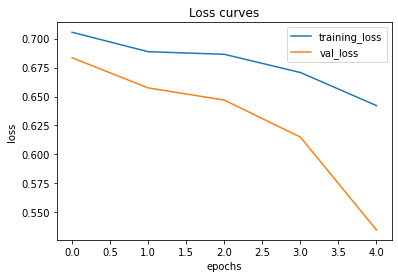

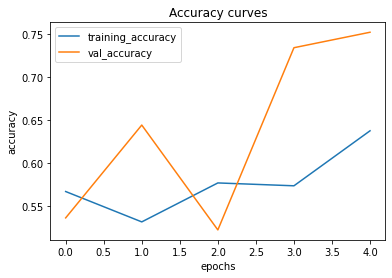

In [ ]:
plot_loss_curve(history_6)

In [ ]:
# making Model with shuffle augmneted data
train_data_augmented_shuffled = train_datagen_augmentation.flow_from_directory(train_dir, target_size=(224,224), class_mode="binary", batch_size=32, shuffle =True)


Found 1500 images belonging to 2 classes.


In [ ]:
# Create Model
tf.random.set_seed(42)

# Define Model
model_7 = Sequential([
   Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
   MaxPool2D(pool_size=2),
   Conv2D(filters=10, kernel_size=3, activation="relu"),
   MaxPool2D(),
   Conv2D(filters=10, kernel_size=3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")                      
])

# Compile Model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit Model
history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 47s 977ms/step - loss: 0.6276 - accuracy: 0.6480 - val_loss: 0.4814 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 47s 1s/step - loss: 0.5572 - accuracy: 0.7113 - val_loss: 0.4290 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 46s 975ms/step - loss: 0.5167 - accuracy: 0.7367 - val_loss: 0.3629 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 46s 974ms/step - loss: 0.5168 - accuracy: 0.7560 - val_loss: 0.4125 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 46s 975ms/step - loss: 0.4781 - accuracy: 0.7820 - val_loss: 0.3135 - val_accuracy: 0.8740


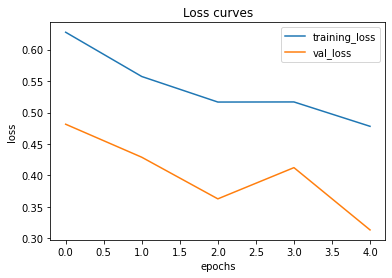

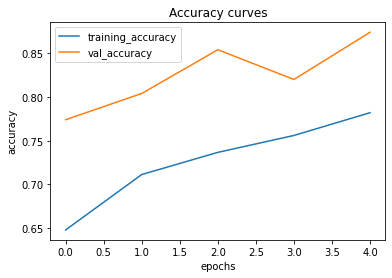

In [ ]:
plot_loss_curve(history_7)

In [ ]:
# Downloading custom image

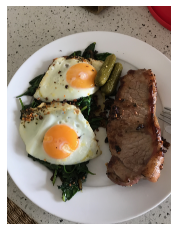

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

steak = mpimg.imread("03-steak.jpeg.1")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Shape of Image
steak.shape, steak

((4032, 3024, 3), array([[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],
 
        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],
 
        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],
 
        ...,
 
        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],
 
        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],
 
        [[148, 127, 100],
         [149, 127, 103],
         [114,  94,  70],
         ...,
         [1

In [ ]:
model_7.predict(steak )

ValueError: ignored

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

In [ ]:
model_7.predict(expanded_steak)

ValueError: ignored

In [ ]:
# Create Helper function to preprocess data as in form of train data

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """ 
  Read an image from filename & turn it into a tesnor & reshape it

  """
  # Read Image
  img = tf.io.read_file(filename)

  # Decode image inot tensor
  img = tf.image.decode_image(img)

  # Resize
  img = tf.image.resize(img, size=(img_shape, img_shape))

  # Scale Image
  img = img/255.

  return img

In [ ]:
# Load in & pre process our custom image
steak = load_and_prep_image("/content/03-steak.jpeg.1")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.8518983]], dtype=float32)

In [ ]:
class_names = ["pizza", "steak"]

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image, predict & plot name
  """

  # IMport the target image
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Class Name
  pred_class = class_names[int(tf.round(pred))]

  # plot predicted image
  plt.imshow(img)
  plt.axis(False)
  plt.title(f"Prediction : {pred_class}" )

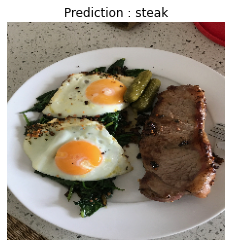

In [ ]:
pred_and_plot(model_7, "/content/03-steak.jpeg.1", class_names = class_names)

In [ ]:
# Multi class Image classification

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-06-21 15:23:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   182MB/s    in 2.7s    

2021-06-21 15:23:21 (182 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/train
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_curry
There are 0 directories and 750 images in 10_food_classes_all_data/train/pizza
There are 0 directories and 750 images in 10_food_classes_all_data/train/steak
There are 0 directories and 750 images in 10_food_classes_all_data/train/sushi
There are 0 directories and 750 images in 10_food_classes_all_data/train/fried_rice
There are 0 directories and 750 images in 10_food_classes_all_data/train/grilled_salmon
There are 0 directories and 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 directories and 750 images in 10_food_classes_all_data/train/ramen
There are 0 directories and 750 images in 10_food_classes_all_data/train/ice_cream
There are 0 directories and 750 images in 10_food_classes_all_data/train/hamburger
There are 10 directories and 0 imag

In [ ]:
# Train & Test Dir

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Visualize Data

In [ ]:
import random
import matplotlib.pyplot as plt
def view_random_image(train_dir, target_class):
  train_image_path = train_dir+target_class

  image_list = os.listdir(train_image_path)
  random_num = random.randint(0,len(image_list))

  img = plt.imread(train_image_path+"/"+image_list[random_num])

  print(f"Image Shape is {img.shape}")
  plt.imshow(img)
  plt.axis(False)
  plt.title(target_class)

Image Shape is (512, 512, 3)


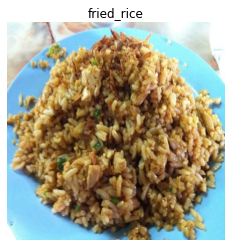

In [ ]:
view_random_image(train_dir=train_dir, target_class = random.choice(class_names))

In [ ]:
# Creating Data reading Pipeline

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 

train_datagen= ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               shuffle=True,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical",
                                            shuffle=True)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
# Set Seed
tf.random.set_seed(42)

# Define Model.
model_8 = Sequential([
   Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
   Conv2D(filters=10,kernel_size=3, activation="relu"),
   MaxPool2D(),
   Conv2D(filters=10, kernel_size=3,activation="relu"),
   Conv2D(filters=10, kernel_size=3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(10, activation="softmax")                      
])

# Compile Model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit Model
history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 3.2956 - accuracy: 0.2828


[3.2956383228302, 0.28279998898506165]

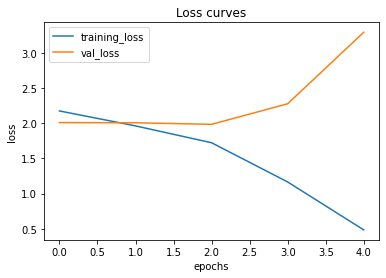

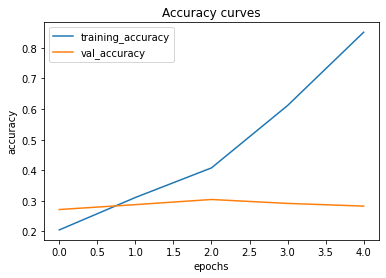

In [ ]:
plot_loss_curve(history_8)

In [ ]:
# Adjust for overfitting

In [ ]:
# Simple Model
model_9 = Sequential([
  Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10,3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10,activation="softmax")

])


model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 123s 212ms/step - loss: 2.1273 - accuracy: 0.2323 - val_loss: 1.9158 - val_accuracy: 0.3292
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.7361 - accuracy: 0.4149 - val_loss: 1.8249 - val_accuracy: 0.3676
Epoch 3/5
235/235 [==============================] - 50s 213ms/step - loss: 1.3170 - accuracy: 0.5760 - val_loss: 1.9289 - val_accuracy: 0.3544
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 0.8166 - accuracy: 0.7469 - val_loss: 2.2551 - val_accuracy: 0.3352
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 0.4433 - accuracy: 0.8791 - val_loss: 2.6447 - val_accuracy: 0.3352


In [ ]:
plot_lost_curves(history_9)

NameError: ignored

In [ ]:
# Lets try augmentation

In [ ]:
train_datagen_augmentation = ImageDataGenerator(rescale=1/255.,
                                                horizontal_flip=True,
                                                rotation_range=0.2,
                                                height_shift_range=0.2,
                                                width_shift_range=0.2,
                                                shear_range=0.2)

train_data_augmented = train_datagen_augmentation.flow_from_directory(train_dir,
                                                                      class_mode="categorical",
                                                                      shuffle=True,
                                                                      target_size=(224,224),
                                                                      batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone Model
model_10 = tf.keras.models.clone_model(model_8)

# Compile Model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"]
                 )

# Fit Model
history_10 = model_10.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented), validation_data= test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 132s 560ms/step - loss: 2.2503 - accuracy: 0.1613 - val_loss: 2.0684 - val_accuracy: 0.2580
Epoch 2/5
235/235 [==============================] - 132s 560ms/step - loss: 2.1221 - accuracy: 0.2259 - val_loss: 2.0079 - val_accuracy: 0.2716
Epoch 3/5
235/235 [==============================] - 131s 559ms/step - loss: 2.0782 - accuracy: 0.2575 - val_loss: 1.9598 - val_accuracy: 0.3168
Epoch 4/5
235/235 [==============================] - 132s 560ms/step - loss: 2.0552 - accuracy: 0.2644 - val_loss: 1.9033 - val_accuracy: 0.3264
Epoch 5/5
235/235 [==============================] - 131s 558ms/step - loss: 1.9981 - accuracy: 0.2999 - val_loss: 1.8563 - val_accuracy: 0.3468


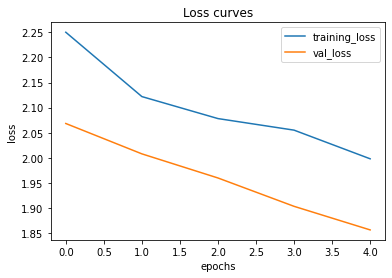

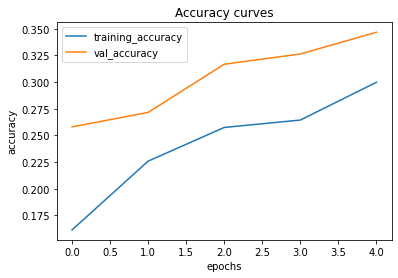

In [ ]:
plot_loss_curve(history_10)

In [ ]:
# Predict Custome Image

!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg

--2021-06-21 16:29:41--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg       [ <=>                ] 109.25K  --.-KB/s    in 0.08s   

2021-06-21 16:29:42 (1.38 MB/s) - ‘03-pizza-dad.jpeg’ saved [111871]



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mimage

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
import PIL

plt.imread("03-pizza-dad.jpeg")

UnidentifiedImageError: ignored

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """ 
  Read an image from filename & turn it into a tesnor & reshape it

  """
  # Read Image
  img = tf.io.read_file(filename)

  # Decode image inot tensor
  img = tf.image.decode_jpeg(img)

  # Resize
  img = tf.image.resize(img, size=(img_shape, img_shape))

  # Scale Image
  img = img/255.

  return img

In [ ]:
load_and_prep_image("03-pizza-dad.jpeg")

InvalidArgumentError: ignored

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Import an image, predict & plot name
  """

  # IMport the target image
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Adding Logci for multiclass
  if len(pred) > 1:
      pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(np.round(pred[0]))]

  
  # plot predicted image
  plt.imshow(img)
  plt.axis(False)
  plt.title(f"Prediction : {pred_class}" )

In [ ]:
pred_and_plot(model=model_10,
              filename="/content/03-pizza-dad.jpeg",
              class_names=class_names)

InvalidArgumentError: ignored

In [ ]:
model_10.save("model_10.h5")

model_10.save("model_10")

INFO:tensorflow:Assets written to: model_10/assets


In [ ]:
load_model_10 = tf.keras.models.load_model("model_10")

In [ ]:
load_model_10.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 1.8563 - accuracy: 0.3468


[1.856313705444336, 0.3467999994754791]

In [ ]:
model_10.evaluate(test_data)

NameError: ignored

In [ ]:
# Transfer leraning